# Steps

1. Import the libraries

2. Import the dataset

3. Perform the Data Analysis (DM, DE, DC, DV, EDA)

4. Feature Scaling

5. Encoding

6. Feature Selection

7. Choosing the model Regression Logistic

8. Split the data - CV

9. Training the model

10. Test the model

11. Performance Confusion Metric

importing libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
from sklearn.metrics import confusion_matrix

#Importing the dataset

In [55]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
#  TARGET- SURVIVED ,FEATURES -REST ALL EXCEPT SURVIVED
df.tail() # total 891 data points

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [58]:
df.shape

(891, 12)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

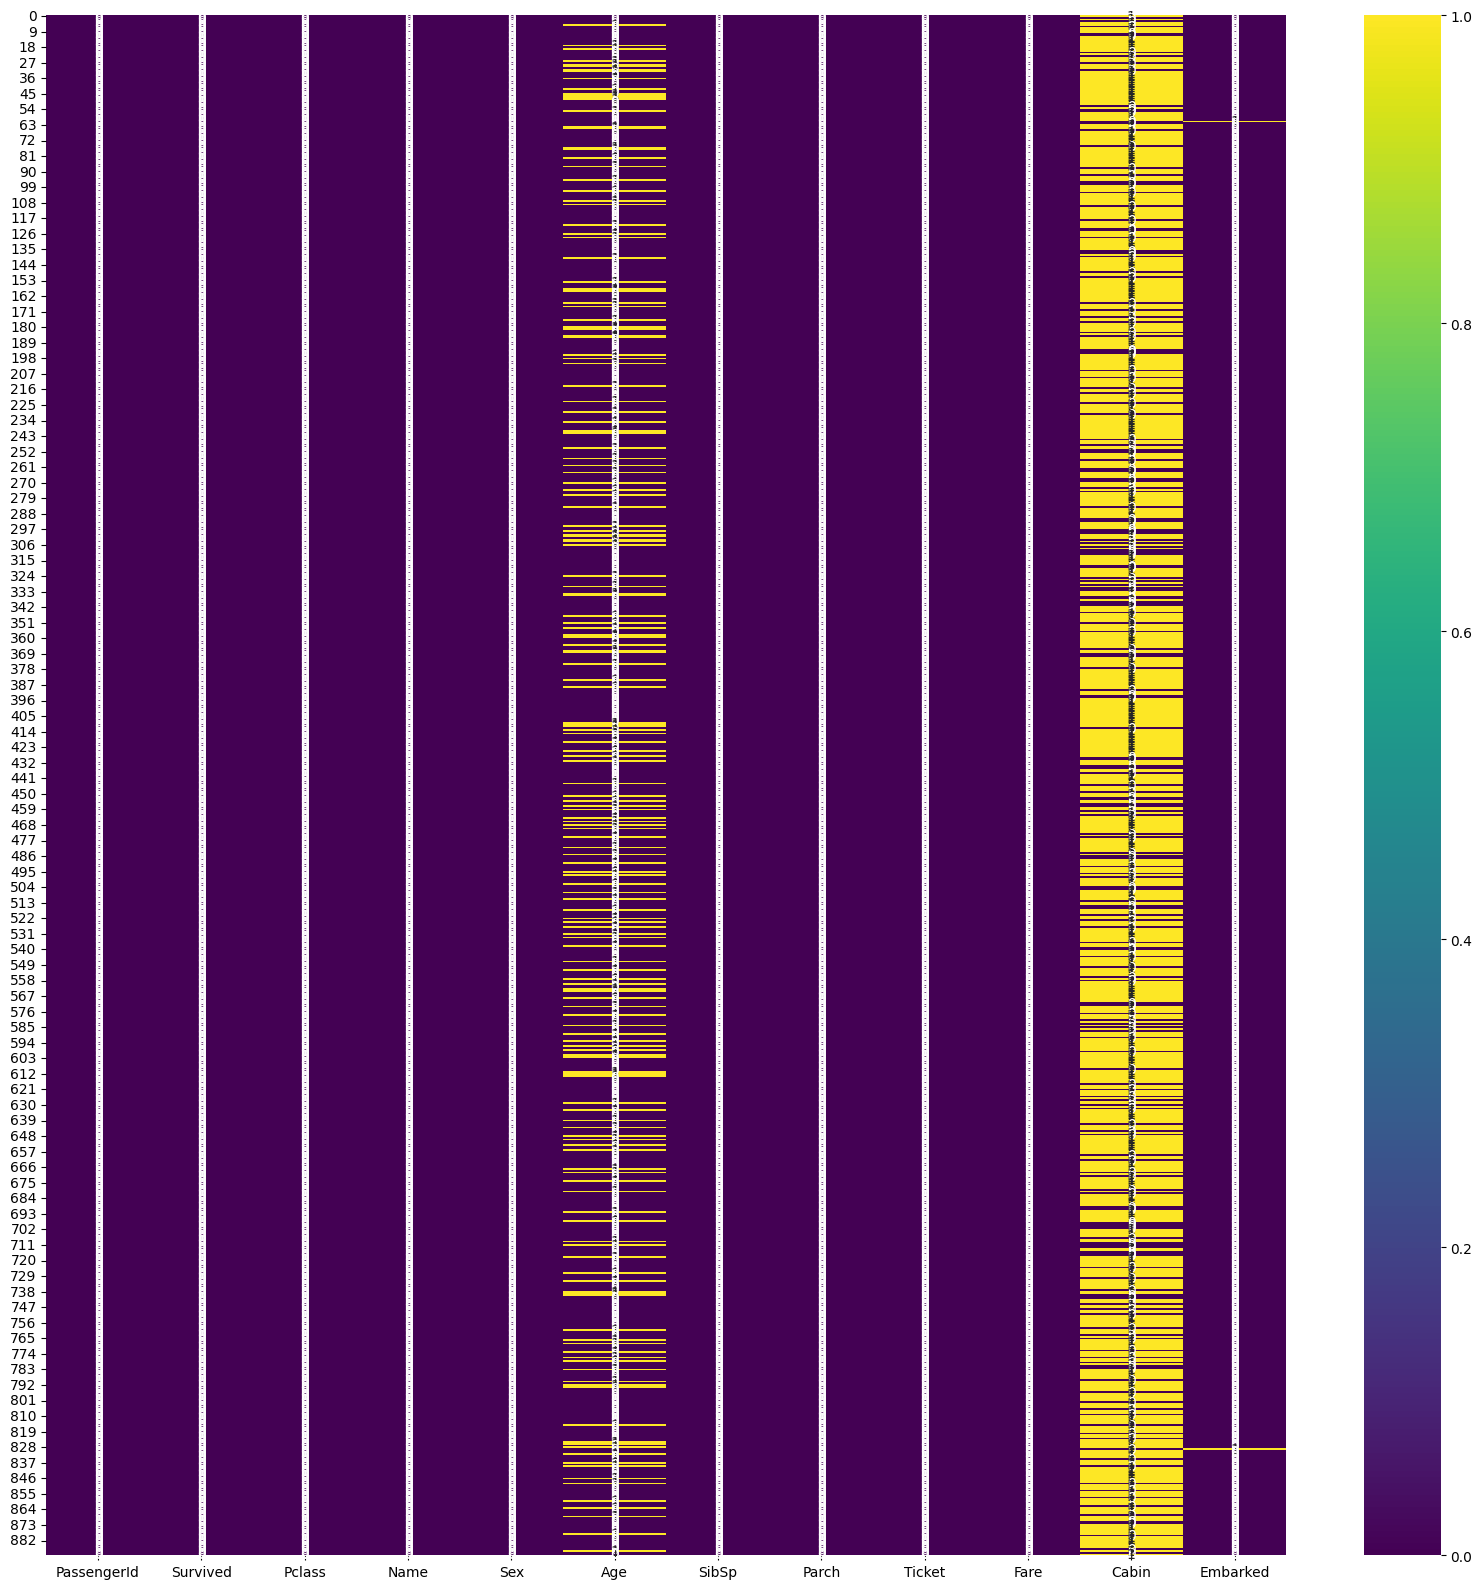

In [61]:
# age ,embarked,cabin has null values like 177,687,2
#   AGE IS IN FLOAT
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),cmap='viridis',annot=True)

In [62]:
# age% ,cabin has many missing values
(df.Age.isnull().sum()/len(df))*100

19.865319865319865

In [63]:
(df.Cabin.isnull().sum()/len(df))*100

77.10437710437711

In [64]:
# percentage of null values in Cabin column is too much high so just drop it,and its not gonna impact the target value,survived
df.drop('Cabin',axis=1,inplace=True)

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [66]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [67]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [68]:
# s-southampston
# Q -queenstown
# c-cherbourg

In [69]:
# show the datapoints where embark is null as we have only 2 null values#
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [70]:
# show all the embarked values where pclass =1
df[df.Pclass==1].Embarked.value_counts()

,count
Embarked,
S,127
C,85
Q,2


In [71]:
# show all the embarked values where pclass=2
df[df.Pclass==2].Embarked.value_counts()

,count
Embarked,
S,164
C,17
Q,3


In [72]:
# show all the embarked values where pclass=3
df[df.Pclass==3].Embarked.value_counts()

,count
Embarked,
S,353
Q,72
C,66


In [73]:
# embarked is not as much import,just drop it ,as we cant fill any value
df.dropna(inplace=True)

In [74]:
# now filll the missing values of age column
df.Age.mean()

29.64209269662921

In [75]:
df.Age.median()

28.0

In [76]:
df.Age.mode()

,Age
0,24.0


In [77]:
# filling the missing values with median is better than filling it with mean as when in case of outliers it results in max change of output,mode also doesnt work


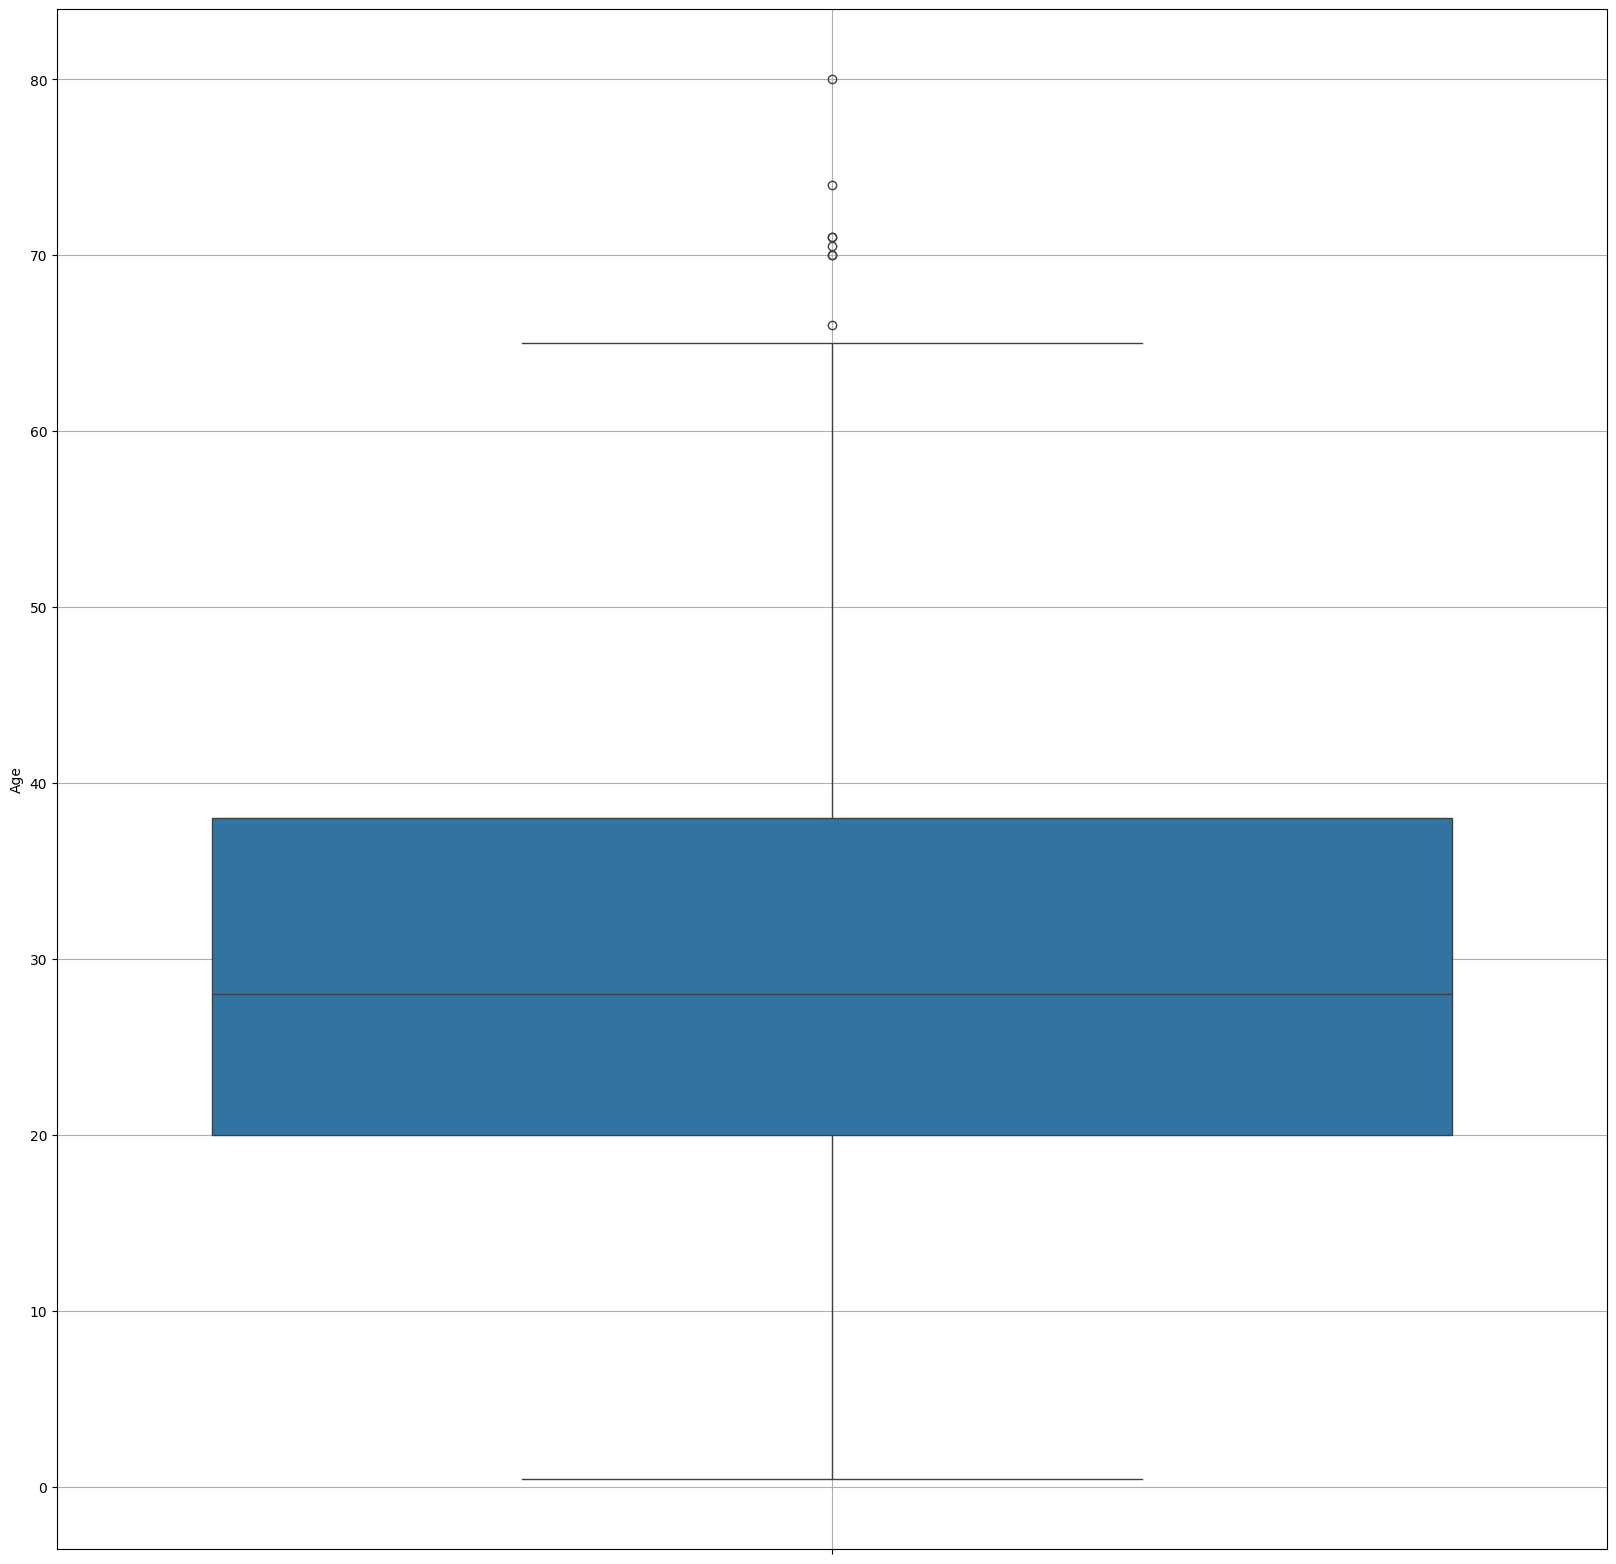

In [78]:
# plot a boxplot in Age column
plt.figure(figsize=(20,20))
sns.boxplot(df.Age) # there are outliers that black circles
plt.grid()

In [79]:
# from the above cells it is clear that median=28.0 and from above graph it is clear that the line in above box is at 28.0
# and we have 6 outliers that black circles in box plot are 6
# even if outliers comes median will give its answer without being changing i.e doesnt depends on outliers



In [80]:
# fill all the null values in age column with its median
df.Age.fillna(df.Age.median(),inplace=True)

<ipython-input-80-336b300caa0d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(),inplace=True)


In [81]:
# checking age is filled or not
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [82]:
# drop uncessary columns -passengerId ,name,ticket
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [83]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


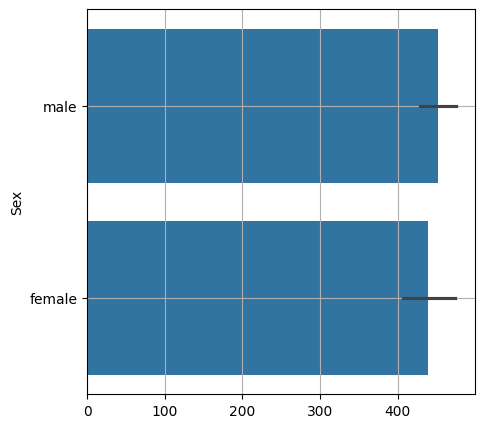

In [84]:
# plot a graph : strength of male v/s  strength of femle
plt.figure(figsize=(5,5))
sns.barplot(df.Sex)
plt.grid()

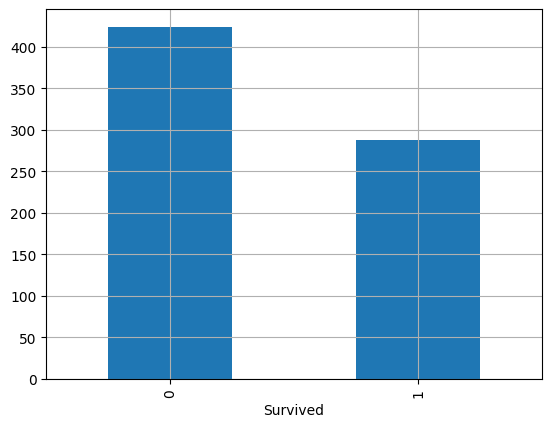

In [85]:
# plot a graph : strength of survival v/s  strength of non survival
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

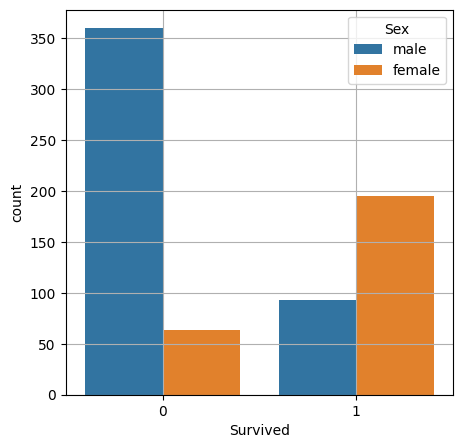

In [86]:
# plot a graph of survived and non survived with respect to male and female
# plot a graph of survived and non survived with respect to male and female
plt.figure(figsize=(5,5))
# Specify 'x' and 'hue' explicitly to use long-form data
sns.countplot(x='Survived', hue='Sex', data=df)
plt.grid()

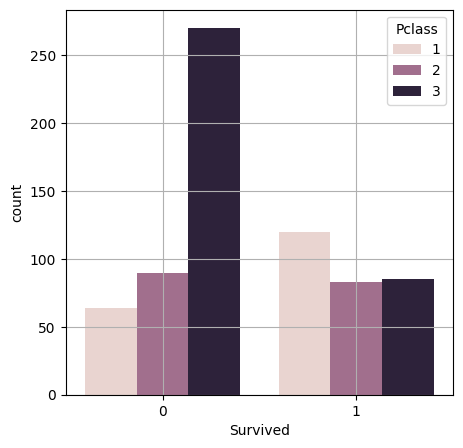

In [87]:
plt.figure(figsize=(5,5))
# Specify 'x' and 'hue' explicitly to use long-form data
sns.countplot(x='Survived', hue='Pclass', data=df)  # pclass-passengerClass
plt.grid()

In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [89]:
df.Sex=le.fit_transform(df.Sex)

In [90]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [91]:
# convert datatype of age column to integer
df.Age=df.Age.astype(int)

In [92]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


In [93]:
# sisp means siblingg/spouse
# parch means parent/children
# convert fare column to 2 decimal integers
df.Fare=round(df.Fare,2)

In [94]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [95]:
# embark also contains categorical data so convert into numbers by using encoders
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [96]:
newdf=df.copy()

In [97]:
# newdf=pd.get_dummies(newdf,columns=['Embarked'])

In [98]:
# newdf.head()

In [99]:
# newdf.info()

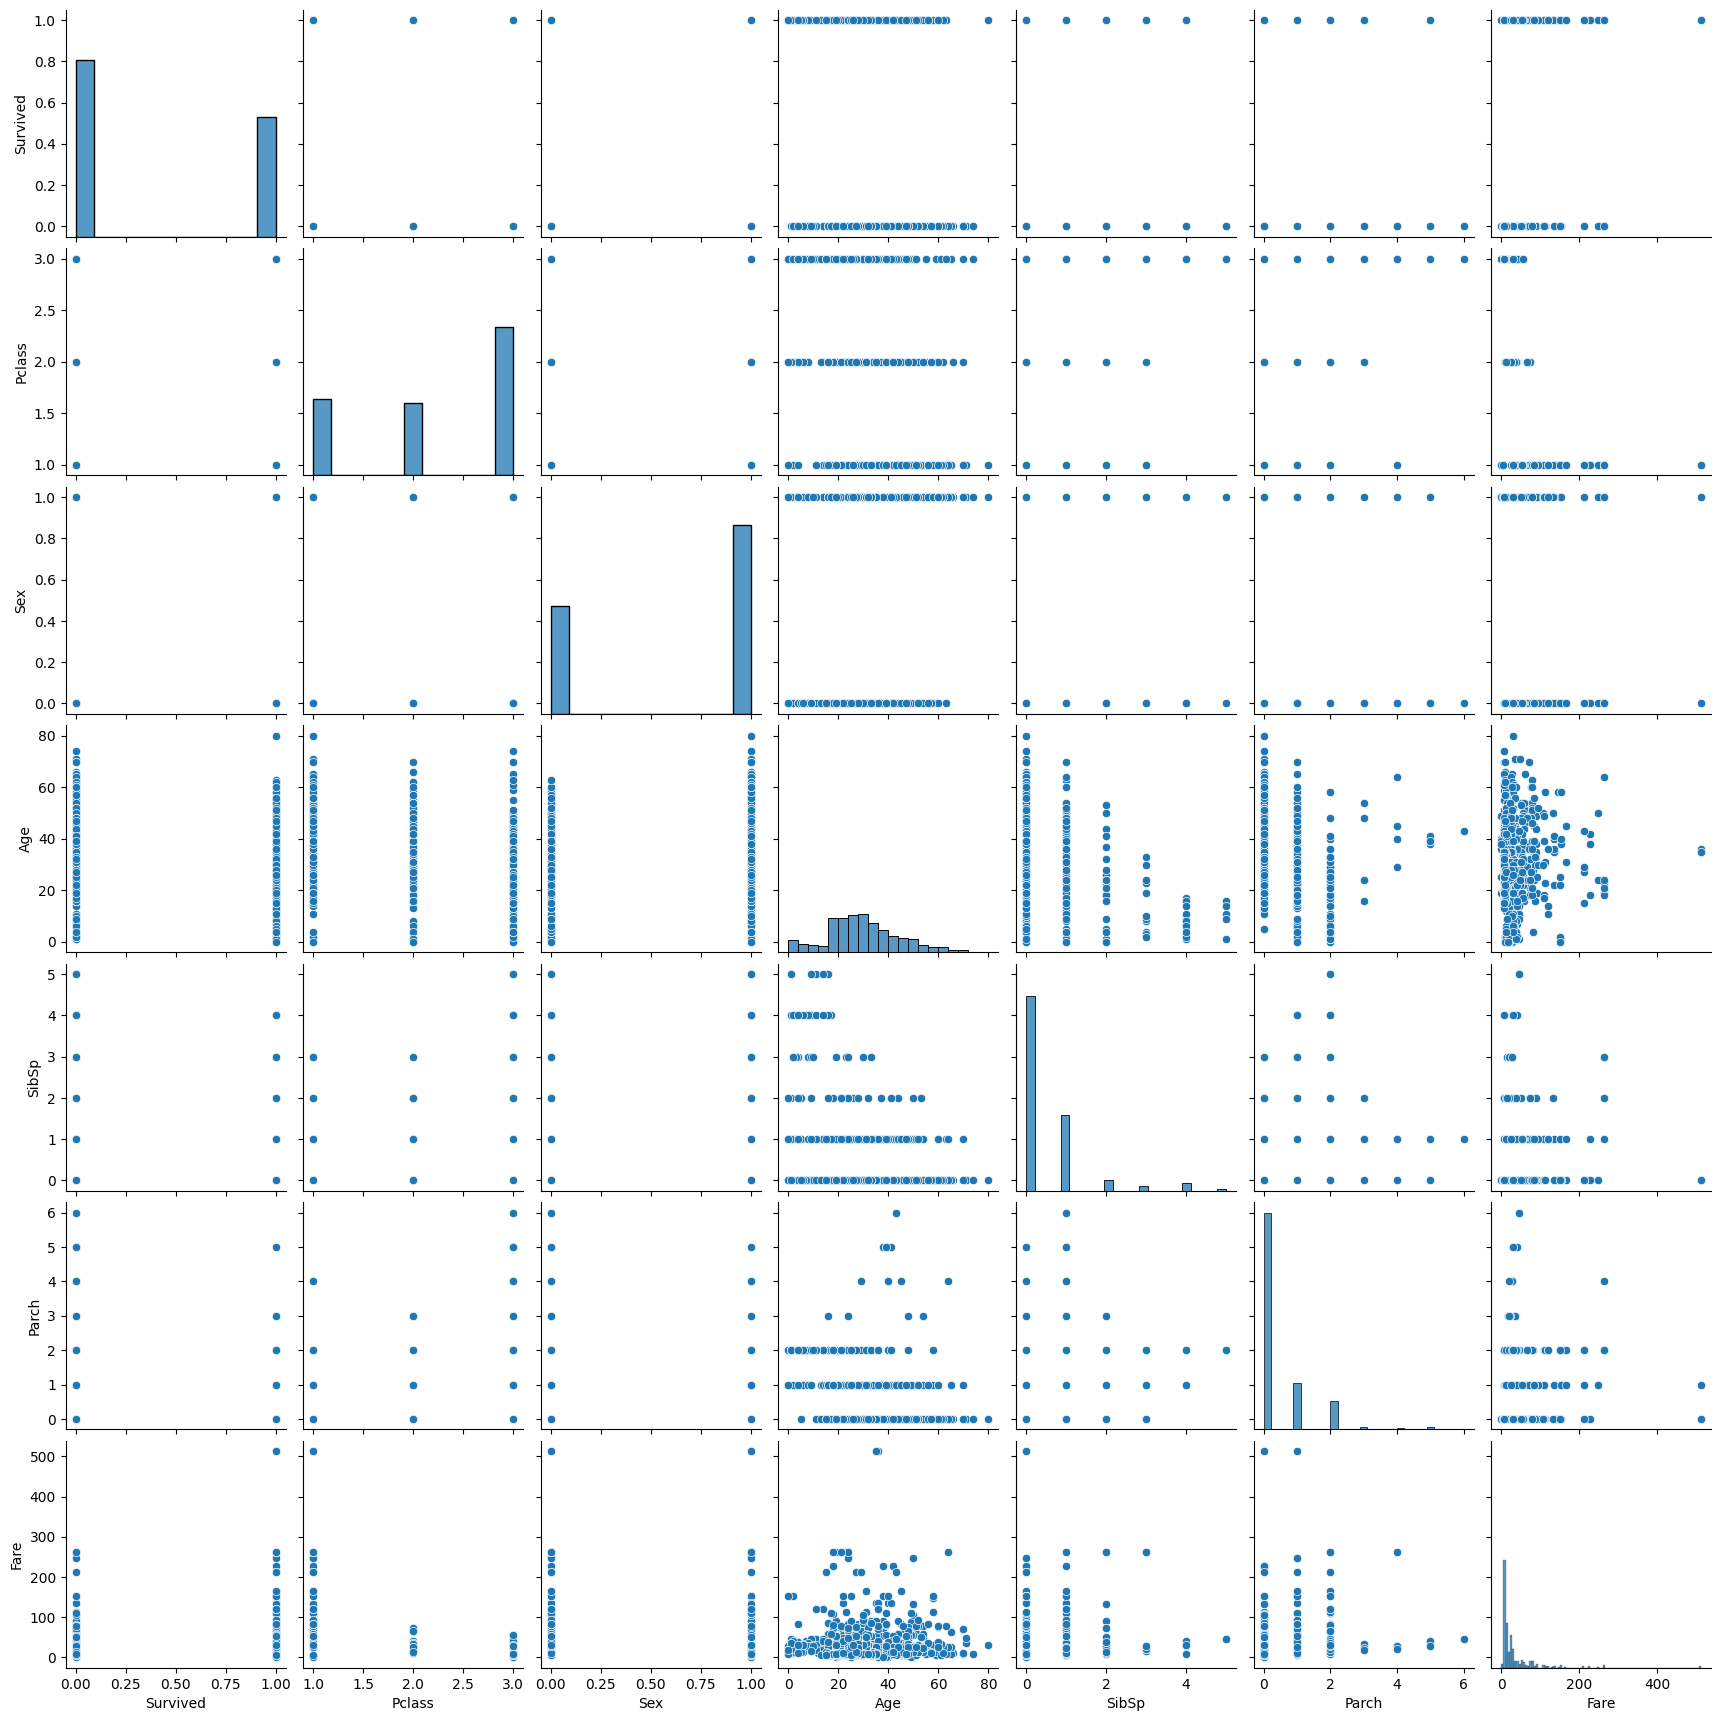

In [100]:
sns.pairplot(df)

In [101]:
x=df.drop('Survived',axis=1)
y=df.Survived

In [102]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.25,S
1,1,0,38,1,0,71.28,C
2,3,0,26,0,0,7.92,S
3,1,0,35,1,0,53.10,S
4,3,1,35,0,0,8.05,S
...,...,...,...,...,...,...,...
885,3,0,39,0,5,29.12,Q
886,2,1,27,0,0,13.00,S
887,1,0,19,0,0,30.00,S
889,1,1,26,0,0,30.00,C


In [103]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [104]:
from sklearn.ensemble import ExtraTreesClassifier


In [105]:
feat=ExtraTreesClassifier()

In [106]:
# feat.fit(x,y)

In [107]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

# Assuming x is your pandas DataFrame
# ... (Your code to load and define x and y) ...

# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in x.columns:
    if x[col].dtype == 'object':  # Check if the column is of object type (string/categorical)
        x[col] = encoder.fit_transform(x[col])  # Encode the column

# Fit the model with the encoded data
feat = ExtraTreesClassifier()
feat.fit(x, y)

ExtraTreesClassifier()

In [108]:
feat.feature_importances_

array([0.11376762, 0.27844722, 0.26703186, 0.04476451, 0.0404766 ,
       0.22824198, 0.0272702 ])

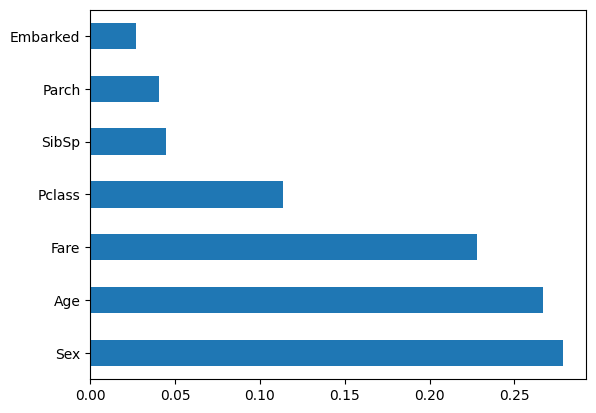

In [109]:
feat_imp=pd.Series(feat.feature_importances_,index=x.columns)
feat_imp.nlargest(8).plot(kind='barh')
plt.show()

In [110]:
# over here we have more feature importance on Sex <Age<fare<..... i.e known as "FEATURE SELECTION"
skf=StratifiedKFold(n_splits=5)

In [111]:
for train_index,test_index in skf.split(x,y):
  x_train,x_test=x.iloc[train_index],x.iloc[test_index]
  y_train,y_test=y.iloc[train_index],y.iloc[test_index]


In [112]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.25,2
1,1,0,38,1,0,71.28,0
2,3,0,26,0,0,7.92,2
3,1,0,35,1,0,53.10,2
4,3,1,35,0,0,8.05,2
...,...,...,...,...,...,...,...
714,2,1,52,0,0,13.00,2
715,3,1,19,0,0,7.65,2
719,3,1,33,0,0,7.78,2
721,3,1,17,1,0,7.05,2


In [113]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
714,0
715,0
719,0
721,0


In [114]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
712,1,1,48,1,0,52.00,2
716,1,0,38,0,0,227.52,0
717,2,0,27,0,0,10.50,2
720,2,0,6,0,1,33.00,2
723,2,1,50,0,0,13.00,2
...,...,...,...,...,...,...,...
885,3,0,39,0,5,29.12,1
886,2,1,27,0,0,13.00,2
887,1,0,19,0,0,30.00,2
889,1,1,26,0,0,30.00,0


In [115]:
y_test

,Survived
712,1
716,1
717,1
720,1
723,0
...,...
885,0
886,0
887,1
889,1


Model Selection

In [116]:
classifier=LogisticRegression()

training/fitting the model

In [117]:
classifier.fit(x_train,y_train)

LogisticRegression()

test the model

In [118]:
y_pred=classifier.predict(x_test)

In [119]:
final=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [120]:
final.head(10)

,Actual,Predicted
712,1,0
716,1,1
717,1,1
720,1,1
723,0,0
724,1,1
725,0,0
726,1,1
728,0,0
729,0,1


<Axes: >

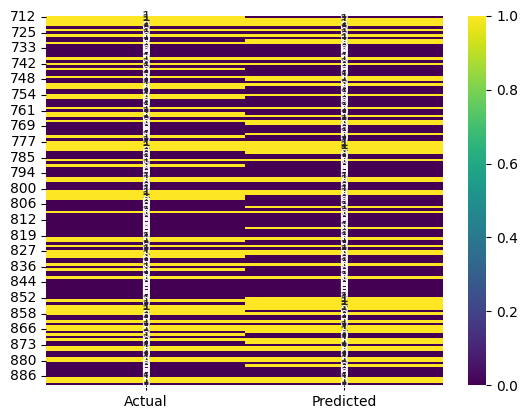

In [121]:
sns.heatmap(final,annot=True,cmap='viridis')

performance metrics-confusion matrix

In [122]:
confusion_matrix(y_test,y_pred)

array([[72, 12],
       [14, 44]])

In [123]:
from sklearn.metrics import accuracy_score


In [124]:
accuracy_score(y_test,y_pred)

0.8169014084507042